In [6]:

import numpy as np
import pandas as pd

# Génération de données aléatoires pour l'AFC
np.random.seed(42)  # Pour la reproductibilité

# Paramètres
n_lignes = 25  # Plus de 20 lignes
n_colonnes = 5  # 5 colonnes

# Génération de données de comptage (entiers positifs)
donnees_afc = np.random.poisson(lam=10, size=(n_lignes, n_colonnes))

# Conversion en DataFrame avec des noms significatifs
lignes = [f"Individu_{i+1}" for i in range(n_lignes)]
colonnes = [f"Variable_{chr(65+j)}" for j in range(n_colonnes)]  # A, B, C, D, E

df_afc = pd.DataFrame(donnees_afc, index=lignes, columns=colonnes)

print("Données générées pour l'AFC :")
print(df_afc)
print(f"\nDimensions : {df_afc.shape}")

Données générées pour l'AFC :
             Variable_A  Variable_B  Variable_C  Variable_D  Variable_E
Individu_1           12           6          11          14           7
Individu_2            8           9          11           8          10
Individu_3            7          11          11           8          12
Individu_4            6           7           8          10           5
Individu_5            3           9          13           8           6
Individu_6           13          12          13           9          14
Individu_7            8           8          12          15          13
Individu_8           13          10           8          15           9
Individu_9            7           8          13          15           8
Individu_10           7           9           6          16          10
Individu_11          18          10           8          11           3
Individu_12          15           6           7           9          11
Individu_13           8          1

In [7]:
# Vérification des données
print("\n=== VÉRIFICATION DES DONNÉES ===")
print(f"Type des données : {type(df_afc)}")
print(f"Dimensions : {df_afc.shape}")
print(f"Valeurs manquantes :\n{df_afc.isnull().sum()}")

print("\n=== STATISTIQUES DESCRIPTIVES ===")
print(df_afc.describe())

print("\n=== SOMME DES LIGNES ET COLONNES ===")
print("Somme par ligne :")
print(df_afc.sum(axis=1))
print("\nSomme par colonne :")
print(df_afc.sum(axis=0))


=== VÉRIFICATION DES DONNÉES ===
Type des données : <class 'pandas.core.frame.DataFrame'>
Dimensions : (25, 5)
Valeurs manquantes :
Variable_A    0
Variable_B    0
Variable_C    0
Variable_D    0
Variable_E    0
dtype: int64

=== STATISTIQUES DESCRIPTIVES ===
       Variable_A  Variable_B  Variable_C  Variable_D  Variable_E
count   25.000000   25.000000   25.000000   25.000000   25.000000
mean    10.120000    9.040000   10.000000   11.560000    9.280000
std      4.284857    2.111082    2.929733    2.814842    2.791654
min      1.000000    5.000000    3.000000    8.000000    3.000000
25%      7.000000    8.000000    8.000000    9.000000    8.000000
50%     10.000000    9.000000   11.000000   11.000000   10.000000
75%     14.000000   10.000000   12.000000   14.000000   11.000000
max     18.000000   13.000000   16.000000   17.000000   14.000000

=== SOMME DES LIGNES ET COLONNES ===
Somme par ligne :
Individu_1     50
Individu_2     46
Individu_3     49
Individu_4     36
Individu_5     39

In [8]:
# Vérification que les données sont appropriées pour l'AFC
print("\n=== VÉRIFICATION AFC ===")
print("Les données contiennent-elles des valeurs négatives ?", (df_afc < 0).any().any())
print("Somme totale des données :", df_afc.sum().sum())

# Sauvegarde des données si nécessaire
df_afc.to_csv('donnees_afc.csv', index=True)
print("\nDonnées sauvegardées dans 'donnees_afc.csv'")


=== VÉRIFICATION AFC ===
Les données contiennent-elles des valeurs négatives ? False
Somme totale des données : 1250

Données sauvegardées dans 'donnees_afc.csv'


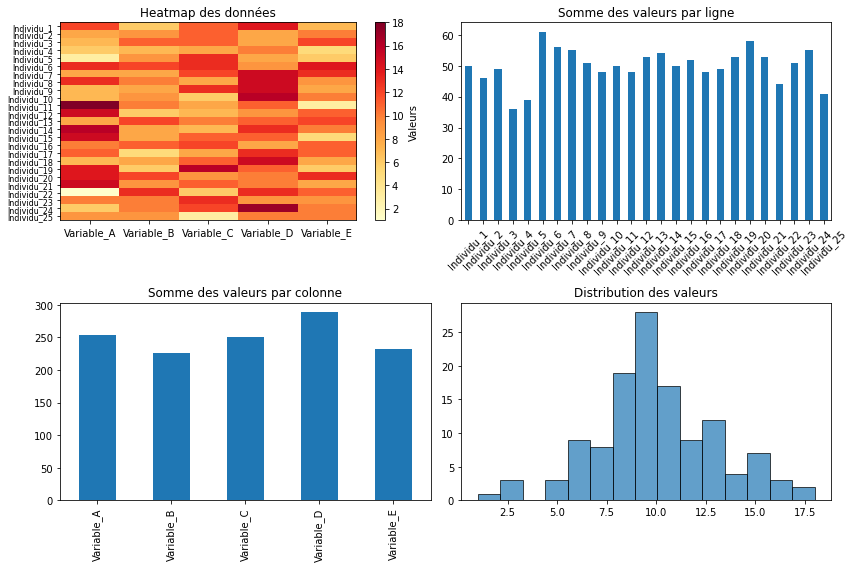

In [9]:
import matplotlib.pyplot as plt

# Visualisation des données
plt.figure(figsize=(12, 8))

# Heatmap des données
plt.subplot(2, 2, 1)
plt.imshow(df_afc.values, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Valeurs')
plt.title('Heatmap des données')
plt.xticks(range(len(colonnes)), colonnes)
plt.yticks(range(len(lignes)), lignes, fontsize=8)

# Distribution des sommes par ligne
plt.subplot(2, 2, 2)
df_afc.sum(axis=1).plot(kind='bar')
plt.title('Somme des valeurs par ligne')
plt.xticks(rotation=45)

# Distribution des sommes par colonne
plt.subplot(2, 2, 3)
df_afc.sum(axis=0).plot(kind='bar')
plt.title('Somme des valeurs par colonne')

# Histogramme des valeurs
plt.subplot(2, 2, 4)
plt.hist(df_afc.values.flatten(), bins=15, alpha=0.7, edgecolor='black')
plt.title('Distribution des valeurs')

plt.tight_layout()
plt.show()

In [16]:
# ⚙️ Bloc 1 — Préparation et rappel
# df_afc est déjà défini dans ton notebook

# Affichage de base
print("Dimensions du tableau :", df_afc.shape)
print("\nAperçu des données :")
display(df_afc.head())

# Rappel :
# Soit un tableau de contingence N (ici df_afc)
# L’AFC consiste à analyser la structure du tableau
# en étudiant les profils en lignes et en colonnes après normalisation.


Dimensions du tableau : (25, 5)

Aperçu des données :


,Variable_A,Variable_B,Variable_C,Variable_D,Variable_E
Individu_1,12,6,11,14,7
Individu_2,8,9,11,8,10
Individu_3,7,11,11,8,12
Individu_4,6,7,8,10,5
Individu_5,3,9,13,8,6


In [17]:
# ⚙️ Bloc 2 — Totaux et fréquences

N = df_afc.values  # matrice de contingence
n_total = N.sum()  # total général

# Fréquence relative (P)
P = N / n_total

# Profils marginaux (poids lignes et colonnes)
r = P.sum(axis=1).reshape(-1, 1)  # somme par ligne
c = P.sum(axis=0).reshape(1, -1)  # somme par colonne

print(f"Effectif total : {n_total}")
print("\nPoids des lignes (r) :\n", r.T)
print("\nPoids des colonnes (c) :\n", c)


Effectif total : 1250

Poids des lignes (r) :
 [[0.04   0.0368 0.0392 0.0288 0.0312 0.0488 0.0448 0.044  0.0408 0.0384
  0.04   0.0384 0.0424 0.0432 0.04   0.0416 0.0384 0.0392 0.0424 0.0464
  0.0424 0.0352 0.0408 0.044  0.0328]]

Poids des colonnes (c) :
 [[0.2024 0.1808 0.2    0.2312 0.1856]]


In [18]:
# ⚙️ Bloc 3 — Centrage et matrice du khi-deux

# Matrices diagonales
Dr_inv_sqrt = np.diag(1 / np.sqrt(r.flatten()))
Dc_inv_sqrt = np.diag(1 / np.sqrt(c.flatten()))

# Matrice centrée et pondérée (matrice du khi-deux)
S = Dr_inv_sqrt @ (P - r @ c) @ Dc_inv_sqrt

print("Matrice S (centrée et pondérée) :")
display(pd.DataFrame(S, index=df_afc.index, columns=df_afc.columns))


Matrice S (centrée et pondérée) :


,Variable_A,Variable_B,Variable_C,Variable_D,Variable_E
Individu_1,0.016715,-0.028598,0.008944,0.020298,-0.021169
Individu_2,-0.012147,0.006701,0.016785,-0.022855,0.014156
Individu_3,-0.026204,0.020343,0.010842,-0.027973,0.027252
Individu_4,-0.013479,0.005446,0.008433,0.016439,-0.018400
Individu_5,-0.049265,0.020758,0.052662,-0.009578,-0.013019
Individu_6,0.005261,0.008272,0.006478,-0.038435,0.022515
Individu_7,-0.028013,-0.018887,0.006761,0.016136,0.022867
Individu_8,0.015836,0.000502,-0.025584,0.018116,-0.010694
Individu_9,-0.029249,-0.011371,0.024797,0.026431,-0.013474
Individu_10,-0.024639,0.003088,-0.032863,0.041624,0.010340


In [19]:
# ⚙️ Bloc 4 — SVD et valeurs propres

U, singular_values, VT = np.linalg.svd(S, full_matrices=False)
eigenvalues = singular_values**2  # valeurs propres

print("Valeurs propres (inerties) :")
for i, val in enumerate(eigenvalues, 1):
    print(f"  Axe {i} : {val:.6f}")

# Pourcentage d’inertie
inertie = 100 * eigenvalues / eigenvalues.sum()
print("\nPourcentage d'inertie par axe :")
for i, val in enumerate(inertie, 1):
    print(f"  Axe {i} : {val:.2f}%")

# Inertie cumulée
inertie_cumulee = np.cumsum(inertie)
print("\nInertie cumulée :", inertie_cumulee)


Valeurs propres (inerties) :
  Axe 1 : 0.036815
  Axe 2 : 0.019424
  Axe 3 : 0.015713
  Axe 4 : 0.007171
  Axe 5 : 0.000000

Pourcentage d'inertie par axe :
  Axe 1 : 46.53%
  Axe 2 : 24.55%
  Axe 3 : 19.86%
  Axe 4 : 9.06%
  Axe 5 : 0.00%

Inertie cumulée : [ 46.52901645  71.07813476  90.93734053 100.         100.        ]


In [20]:
# ⚙️ Bloc 5 — Coordonnées factorielles

# Coordonnées des lignes
F = Dr_inv_sqrt @ U @ np.diag(singular_values)
F_df = pd.DataFrame(F, index=df_afc.index, 
                    columns=[f"Axe_{i+1}" for i in range(F.shape[1])])

# Coordonnées des colonnes
V = VT.T
G = Dc_inv_sqrt @ V @ np.diag(singular_values)
G_df = pd.DataFrame(G, index=df_afc.columns, 
                    columns=[f"Axe_{i+1}" for i in range(G.shape[1])])

print("Coordonnées factorielles des lignes :")
display(F_df.head())

print("\nCoordonnées factorielles des colonnes :")
display(G_df.head())


Coordonnées factorielles des lignes :


,Axe_1,Axe_2,Axe_3,Axe_4,Axe_5
Individu_1,-0.128696,-0.085963,-0.154637,-0.055409,1.682450e-16
Individu_2,0.075301,-0.055148,0.150357,-0.034739,-4.157059e-17
Individu_3,0.170436,-0.001174,0.201767,-0.014827,3.287610e-17
Individu_4,0.063676,-0.094359,-0.108403,0.078980,9.336351e-17
Individu_5,0.265898,-0.323347,0.090334,0.073795,-5.166313e-17



Coordonnées factorielles des colonnes :


,Axe_1,Axe_2,Axe_3,Axe_4,Axe_5
Variable_A,-0.371946,0.053478,0.023138,0.003330,-8.364222e-17
Variable_B,0.132855,0.047826,0.093975,0.155490,-8.364222e-17
Variable_C,0.032805,-0.264923,0.052666,-0.036019,-8.364222e-17
Variable_D,0.072878,0.023190,-0.222592,0.000514,-8.364222e-17
Variable_E,0.150061,0.151682,0.103752,-0.116927,-8.364222e-17


In [21]:
# ⚙️ Bloc 6 — Contributions et qualités de représentation

# Contributions des lignes
CTR_rows = (r * (F**2)) / eigenvalues
CTR_rows = CTR_rows / CTR_rows.sum(axis=0)

# Qualité de représentation (cos²)
COS2_rows = (F**2) / F.sum(axis=1, keepdims=True)**2

CTR_rows_df = pd.DataFrame(CTR_rows, index=df_afc.index, columns=[f"Axe_{i+1}" for i in range(F.shape[1])])
COS2_rows_df = pd.DataFrame(COS2_rows, index=df_afc.index, columns=[f"Axe_{i+1}" for i in range(F.shape[1])])

print("Contributions des lignes (CTR) :")
display(CTR_rows_df.head())

print("\nQualité de représentation (COS²) :")
display(COS2_rows_df.head())


Contributions des lignes (CTR) :


,Axe_1,Axe_2,Axe_3,Axe_4,Axe_5
Individu_1,0.017996,0.015218,0.060873,0.017127,0.161843
Individu_2,0.005668,0.005762,0.052946,0.006193,0.009090
Individu_3,0.030931,0.000003,0.101561,0.001202,0.006056
Individu_4,0.003172,0.013202,0.021538,0.025054,0.035884
Individu_5,0.059919,0.167942,0.016203,0.023695,0.011903



Qualité de représentation (COS²) :


,Axe_1,Axe_2,Axe_3,Axe_4,Axe_5
Individu_1,0.091824,0.040968,0.132572,0.017021,1.569321e-31
Individu_2,0.307602,0.164987,1.226407,0.065467,9.374767e-32
Individu_3,0.228944,0.000011,0.320853,0.001733,8.518559e-33
Individu_4,1.122340,2.464543,3.252767,1.726658,2.412832e-30
Individu_5,6.212513,9.187028,0.717032,0.478508,2.345302e-31


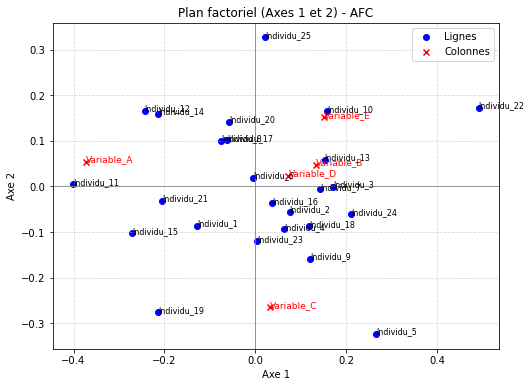

In [24]:
# ⚙️ Bloc 7 — Visualisation (Axes 1 & 2) — version corrigée
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(F_df["Axe_1"], F_df["Axe_2"], color='blue', label="Lignes")
plt.scatter(G_df["Axe_1"], G_df["Axe_2"], color='red', marker='x', label="Colonnes")

# Annotations avec .iloc (plus sûr et sans avertissement)
for i, txt in enumerate(df_afc.index):
    plt.annotate(txt, (F_df["Axe_1"].iloc[i], F_df["Axe_2"].iloc[i]), fontsize=8)

for j, txt in enumerate(df_afc.columns):
    plt.annotate(txt, (G_df["Axe_1"].iloc[j], G_df["Axe_2"].iloc[j]), color='red', fontsize=9)

plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.title("Plan factoriel (Axes 1 et 2) - AFC")
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [23]:
# ⚙️ Bloc 8 — Résumé
print("===== RÉSUMÉ DE L'AFC =====\n")

print("Valeurs propres :")
print(pd.Series(eigenvalues, index=[f"Axe_{i+1}" for i in range(len(eigenvalues))]))

print("\nInerties (%):")
print(pd.Series(inertie, index=[f"Axe_{i+1}" for i in range(len(inertie))]))

print("\nInertie cumulée :")
print(inertie_cumulee)

print("\nCoordonnées principales des lignes :")
display(F_df.iloc[:, :2])

print("\nCoordonnées principales des colonnes :")
display(G_df.iloc[:, :2])


===== RÉSUMÉ DE L'AFC =====

Valeurs propres :
Axe_1    3.681461e-02
Axe_2    1.942371e-02
Axe_3    1.571297e-02
Axe_4    7.170543e-03
Axe_5    6.996020e-33
dtype: float64

Inerties (%):
Axe_1    4.652902e+01
Axe_2    2.454912e+01
Axe_3    1.985921e+01
Axe_4    9.062659e+00
Axe_5    8.842085e-30
dtype: float64

Inertie cumulée :
[ 46.52901645  71.07813476  90.93734053 100.         100.        ]

Coordonnées principales des lignes :


,Axe_1,Axe_2
Individu_1,-0.128696,-0.085963
Individu_2,0.075301,-0.055148
Individu_3,0.170436,-0.001174
Individu_4,0.063676,-0.094359
Individu_5,0.265898,-0.323347
Individu_6,-0.004940,0.018513
Individu_7,0.141919,-0.006269
Individu_8,-0.075864,0.100071
Individu_9,0.120520,-0.158380
Individu_10,0.158045,0.164895



Coordonnées principales des colonnes :


,Axe_1,Axe_2
Variable_A,-0.371946,0.053478
Variable_B,0.132855,0.047826
Variable_C,0.032805,-0.264923
Variable_D,0.072878,0.023190
Variable_E,0.150061,0.151682
